In [10]:
import pickle
with open('kmeans_model(K=10)(1)', 'rb') as f:
    kmeans = pickle.load(f)

In [11]:
import pickle
job_adverts = []
with open('job_advert_variable_dump', 'rb') as f:
    job_adverts = pickle.load(f)
len(job_adverts)

4827

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

def identity_tokenizer(text):
    return text

vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False)  
x = vectorizer.fit_transform(job_adverts)
print("shape : ", x.shape)

C:\Users\uSER\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


shape :  (4827, 30340)


In [13]:
from sklearn.datasets import make_blobs

# Create synthetic dataset with 8 random clusters
X, y = make_blobs(centers=9, n_features=10, shuffle=True, random_state=42)

In [14]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
svd.fit(x)
data2D = svd.transform(x)

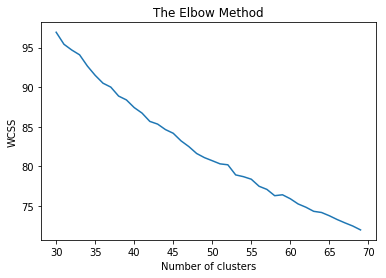

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(30,70):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data2D)
    wcss.append(kmeans.inertia_)
plt.plot(range(30,70),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow(k=30,70).png')
plt.show()

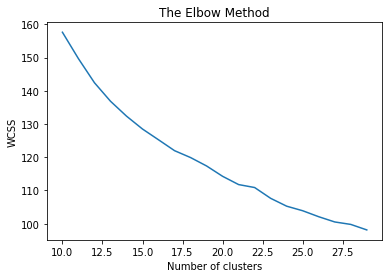

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(10,30):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data2D)
    wcss.append(kmeans.inertia_)
plt.plot(range(10,30),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow(k=10,30).png')
plt.show()

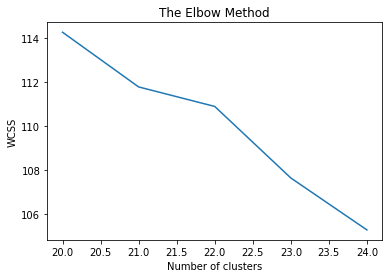

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(20,25):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data2D)
    wcss.append(kmeans.inertia_)
plt.plot(range(20,25),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow(k=20,25).png')
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++',max_iter=100,n_init=10,random_state=0, verbose=True)
visualizer = KElbowVisualizer(kmeans, k=(5,20), metric='calinski_harabaz')

visualizer.fit(data2D)    # Fit the data to the visualizer
visualizer.poof(outpath="elbow(K=10).png")